<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span><ul class="toc-item"><li><span><a href="#CIBERSORT" data-toc-modified-id="CIBERSORT-4.1">CIBERSORT</a></span></li><li><span><a href="#with-Quantiseq" data-toc-modified-id="with-Quantiseq-4.2">with Quantiseq</a></span></li><li><span><a href="#With-MCPcounter" data-toc-modified-id="With-MCPcounter-4.3">With MCPcounter</a></span></li></ul></li></ul></div>

# Dependencies

In [1]:
options(scipen = 999)

In [2]:
library(Hmisc)
library(survival)
library(survminer)
library(forestmodel)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: ggpubr



# Functions


In [3]:
source("~/git/iMATRIX-Atezo_Biomarker/R/ggplot2_theme.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Plots/"

# Main

In [5]:
IND_metadata <- read.csv(file.path(datapath,"/Deconvolution/IND_metadata_IHC_TIMER2.csv"),header = T,
                         stringsAsFactors = F, check.names = F)  

In [6]:
summary(IND_metadata$IHC_CD8)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.010   0.070   0.220   1.149   1.242  10.280 

## CIBERSORT

In [7]:
summary(IND_metadata$IHC_CD8)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.010   0.070   0.220   1.149   1.242  10.280 

In [8]:
dim(IND_metadata)

[1]  66 167

In [9]:
summary(IND_metadata$T_cell_CD8_CIBERSORT_ABS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.03087 0.07859 0.10383 0.83759 

In [10]:
IND_metadata$CD8group <- NA
IND_metadata$CD8group[IND_metadata$T_cell_CD8_CIBERSORT_ABS >= 0.10383] <- "High"

IND_metadata$CD8group[IND_metadata$T_cell_CD8_CIBERSORT_ABS < 0.10383 &
                      IND_metadata$T_cell_CD8_CIBERSORT_ABS > 0] <- "Intermediate"

IND_metadata$CD8group[IND_metadata$T_cell_CD8_CIBERSORT_ABS == 0 ] <- "Low"

In [11]:
sfit <- survfit(Surv(TRTDUR, progressed)~ CD8group, data= IND_metadata)
    
kmplot <- ggsurvplot(sfit, conf.int=FALSE, palette = c("#ED2024", "#adadad", "#3953A4"),
                     pval = TRUE, pval.size = 8, pval.coord = c(300, 0.75),
                     risk.table=TRUE, fontsize = 8,
                     legend = c(0.7, 0.95), font.legend = 16, legend.title = "",
                     font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmplot$table <- kmplot$table + theme(axis.text.x = element_text(size = 20))
kmplot$plot <- kmplot$plot + labs(title = "PFS analysis of CD8 gene signature (CIBERSORT)")

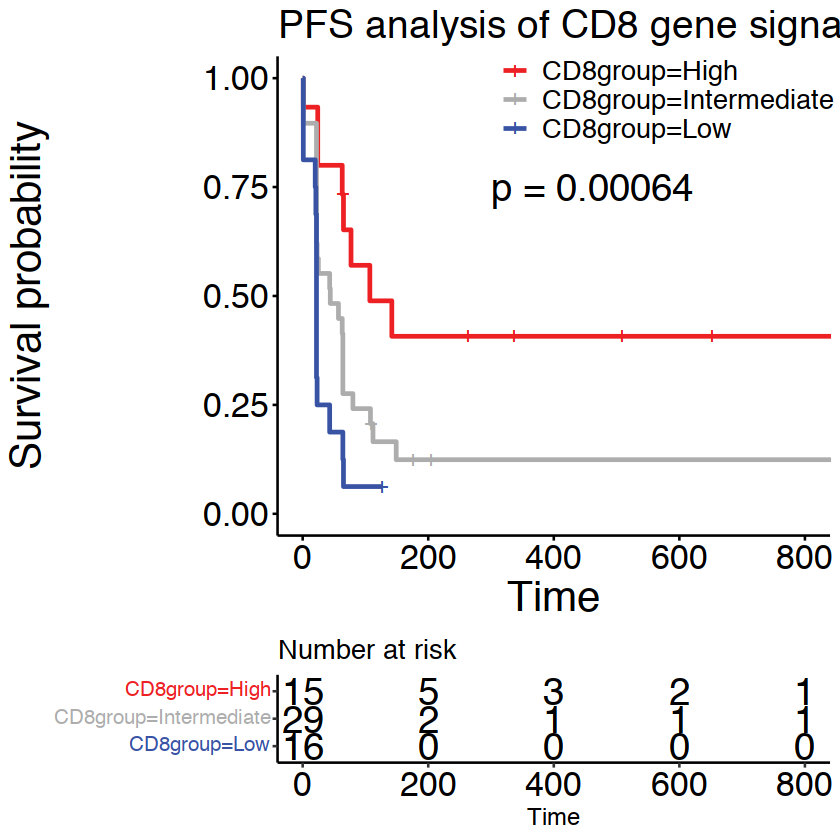

In [12]:
kmplot

In [13]:
pdf(file = paste0(plotpath,"KM_CD8_CIBERSORT_ABS.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
kmplot
dev.off()

pdf 
  2

In [14]:
coxmodel <- coxph(Surv(TRTDUR, progressed) ~ T_cell_CD8_CIBERSORT_ABS + disease_group +
                  sample_origin + AGE, data = IND_metadata)
summary(coxmodel)

Call:
coxph(formula = Surv(TRTDUR, progressed) ~ T_cell_CD8_CIBERSORT_ABS + 
    disease_group + sample_origin + AGE, data = IND_metadata)

  n= 60, number of events= 49 
   (6 observations deleted due to missingness)

                                coef exp(coef)  se(coef)      z Pr(>|z|)  
T_cell_CD8_CIBERSORT_ABS   -3.283143  0.037510  1.734382 -1.893   0.0584 .
disease_groupLymphoma      -0.759274  0.468006  0.818494 -0.928   0.3536  
disease_groupNBL           -0.971179  0.378636  0.941938 -1.031   0.3025  
disease_groupOS             1.319975  3.743327  0.793321  1.664   0.0961 .
disease_groupOther_PDL1neg  0.365927  1.441850  1.052379  0.348   0.7281  
disease_groupOther_PDL1pos  1.769278  5.866619  0.915321  1.933   0.0532 .
disease_groupRMS            1.789375  5.985713  0.767741  2.331   0.0198 *
disease_groupRT            -1.723853  0.178378  1.088779 -1.583   0.1134  
disease_groupSARC           1.531887  4.626899  0.919593  1.666   0.0957 .
disease_groupWILMS         -0.8

In [15]:
cd8_cox <- forest_model(coxmodel,exponentiate = TRUE)

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
“Unable to resize forest panel to be smaller than its heading; consider a smaller text size”


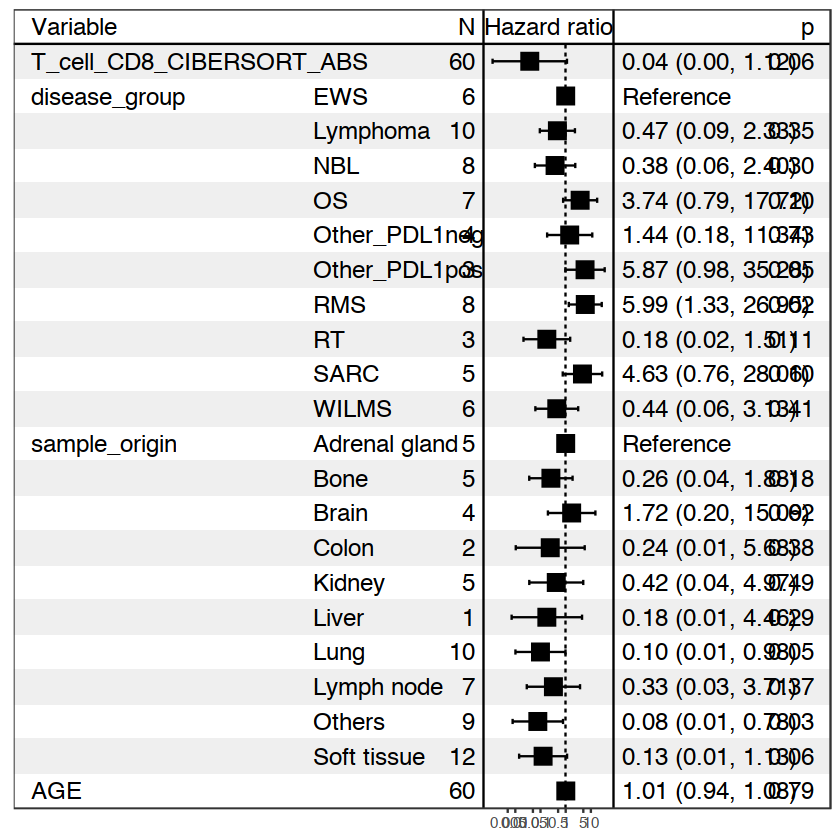

In [16]:
cd8_cox

## with Quantiseq

In [17]:
summary(IND_metadata$T_cell_CD8_QUANTISEQ)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.003412 0.002983 0.053973 

In [18]:
IND_metadata$CD8group <- NA
IND_metadata$CD8group[IND_metadata$T_cell_CD8_QUANTISEQ >= 0.002983] <- "High"

IND_metadata$CD8group[IND_metadata$T_cell_CD8_QUANTISEQ == 0] <- "Low"

In [19]:
sfit <- survfit(Surv(TRTDUR, progressed)~ CD8group, data= IND_metadata)

    
kmplot <- ggsurvplot(sfit, conf.int=FALSE, palette = c("#ED2024", "#adadad", "#3953A4"),
                     pval = TRUE, pval.size = 8, pval.coord = c(0, 0.03),
                     risk.table=TRUE, fontsize = 8,
                     legend = c(0.7, 0.95),font.legend = 16, legend.title = "",
                     font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmplot$table <- kmplot$table + theme(axis.text.x = element_text(size = 20))
kmplot$plot <- kmplot$plot + labs(title = "PFS analysis of CD8 gene signature (QUANTISEQ)")

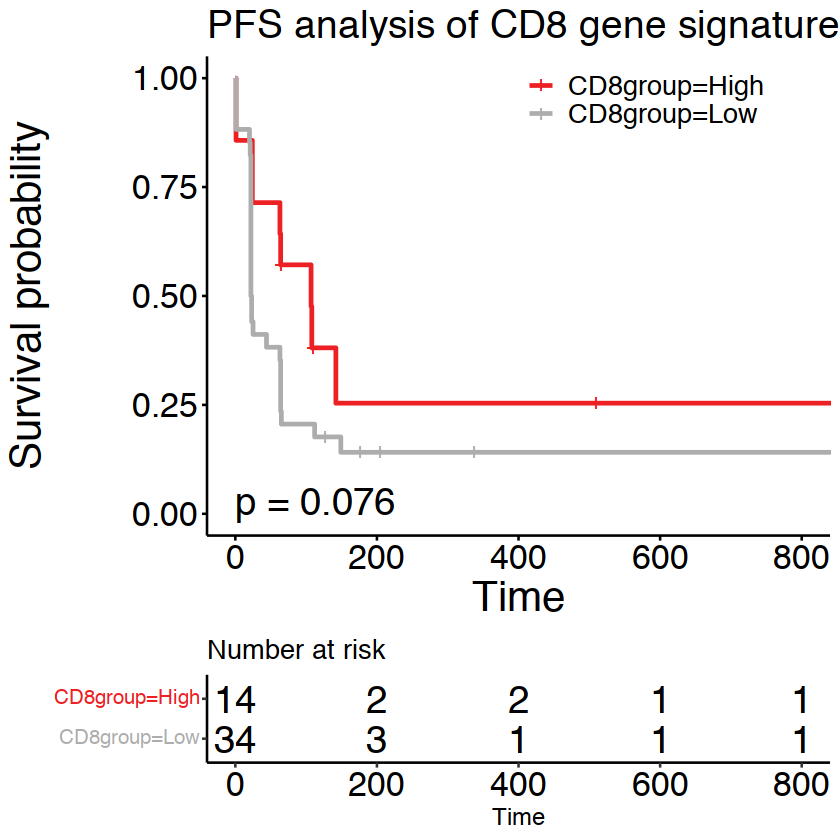

In [20]:
kmplot

In [21]:
coxmodel <- coxph(Surv(TRTDUR, progressed) ~ T_cell_CD8_QUANTISEQ + disease_group +
                  sample_origin + AGE, 
                  data= IND_metadata) 
summary(coxmodel)

Call:
coxph(formula = Surv(TRTDUR, progressed) ~ T_cell_CD8_QUANTISEQ + 
    disease_group + sample_origin + AGE, data = IND_metadata)

  n= 60, number of events= 49 
   (6 observations deleted due to missingness)

                                            coef             exp(coef)
T_cell_CD8_QUANTISEQ       -31.81900711656430758   0.00000000000001518
disease_groupLymphoma       -0.75831957874025413   0.46845296428822175
disease_groupNBL            -0.97385108027458245   0.37762596634388279
disease_groupOS              1.30559978795554565   3.68990158865480122
disease_groupOther_PDL1neg   0.51826255895667706   1.67910776312420595
disease_groupOther_PDL1pos   1.60586100888731309   4.98214742976113367
disease_groupRMS             1.85255413612110842   6.37608412953627646
disease_groupRT             -1.56577800313970417   0.20892540530547751
disease_groupSARC            1.64718668946798119   5.19235156256569841
disease_groupWILMS          -0.61512711802142961   0.54057217447632167
samp

## With MCPcounter

In [22]:
summary(IND_metadata$T_cell_CD8_MCPCOUNTER)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0625  0.2200  0.7679  0.9850  4.9200 

In [23]:
IND_metadata$CD8group <- NA
IND_metadata$CD8group[IND_metadata$T_cell_CD8_MCPCOUNTER >= 0.9850] <- "High"

IND_metadata$CD8group[IND_metadata$T_cell_CD8_MCPCOUNTER < 0.9850 &
                      IND_metadata$T_cell_CD8_MCPCOUNTER > 0.0625] <- "Intermediate"

IND_metadata$CD8group[IND_metadata$T_cell_CD8_MCPCOUNTER <= 0.0625 ] <- "Low"

In [24]:
sfit <- survfit(Surv(TRTDUR, progressed)~ CD8group, data= IND_metadata)
    
kmplot <- ggsurvplot(sfit, conf.int=FALSE, palette = c("#ED2024", "#adadad", "#3953A4"),
                     pval = TRUE, pval.size = 8, pval.coord = c(0, 0.03),
                     risk.table=TRUE, fontsize = 8,
                     legend = c(0.7, 0.95),font.legend = 16, legend.title = "",
                     font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmplot$table <- kmplot$table + theme(axis.text.x = element_text(size = 20))
kmplot$plot <- kmplot$plot + labs(title = "PFS analysis of CD8 gene signature (MCPCOUNTER)")

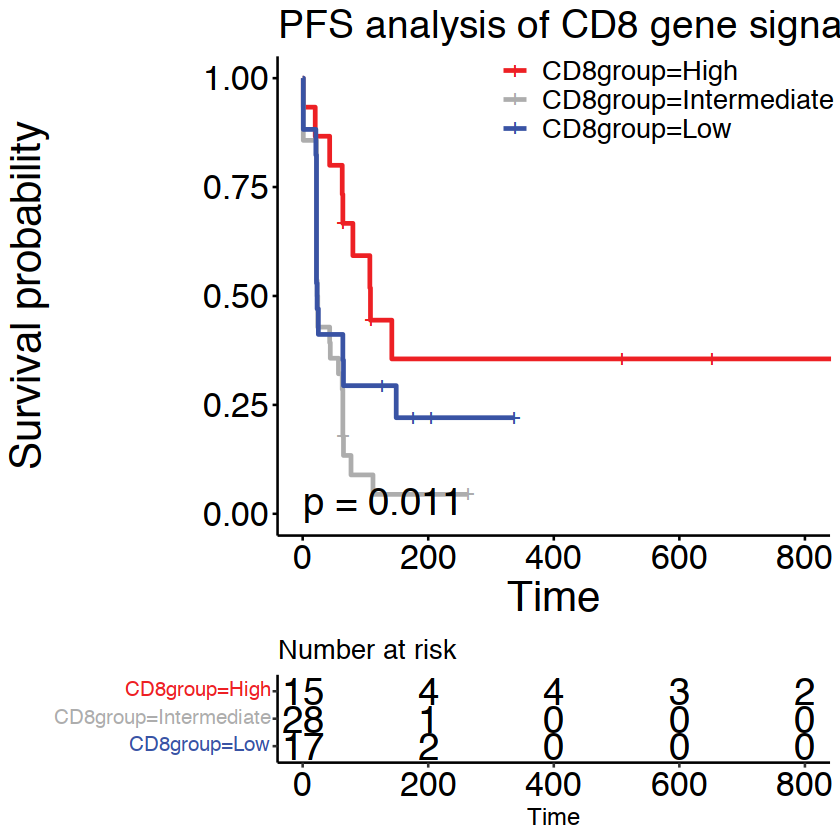

In [25]:
kmplot

In [26]:
coxmodel <- coxph(Surv(TRTDUR, progressed) ~ T_cell_CD8_MCPCOUNTER + disease_group +
                  sample_origin + AGE, data=IND_metadata) 
summary(coxmodel)

Call:
coxph(formula = Surv(TRTDUR, progressed) ~ T_cell_CD8_MCPCOUNTER + 
    disease_group + sample_origin + AGE, data = IND_metadata)

  n= 60, number of events= 49 
   (6 observations deleted due to missingness)

                               coef exp(coef) se(coef)      z Pr(>|z|)  
T_cell_CD8_MCPCOUNTER      -0.21871   0.80355  0.20202 -1.083   0.2790  
disease_groupLymphoma      -0.60632   0.54535  0.90395 -0.671   0.5024  
disease_groupNBL           -0.96165   0.38226  0.95856 -1.003   0.3158  
disease_groupOS             1.38765   4.00541  0.80208  1.730   0.0836 .
disease_groupOther_PDL1neg  0.60952   1.83955  1.05686  0.577   0.5641  
disease_groupOther_PDL1pos  1.38497   3.99470  1.00235  1.382   0.1671  
disease_groupRMS            1.94117   6.96693  0.78612  2.469   0.0135 *
disease_groupRT            -1.53041   0.21645  1.05688 -1.448   0.1476  
disease_groupSARC           1.68278   5.38050  0.92469  1.820   0.0688 .
disease_groupWILMS         -0.50058   0.60618  0.99637